In [10]:
import openpyxl
import requests
import warnings

import pandas as pd

from collections import Counter
from PIL import Image
from io import BytesIO
from tqdm import tqdm

%matplotlib inline
warnings.filterwarnings(action='ignore')

In [2]:
# 이미지를 불러오는 함수
def get_img_from_url(url: str) -> Image:
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

In [4]:
preprocessed_file_path = '/opt/ml/input/data/asset_codishop/view/item/item.xlsx'
preprocessed_df = pd.read_excel(preprocessed_file_path, engine='openpyxl')

In [13]:
Counter(preprocessed_df['cluster_id'].values).most_common()[:10]

[(745, 17),
 (194, 14),
 (3483, 14),
 (1475, 13),
 (4220, 13),
 (3507, 12),
 (2017, 11),
 (6050, 9),
 (386, 8),
 (579, 8)]

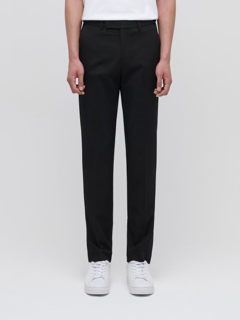

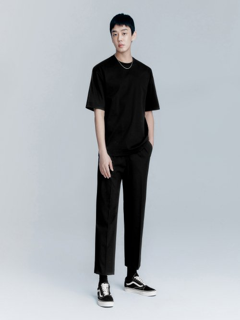

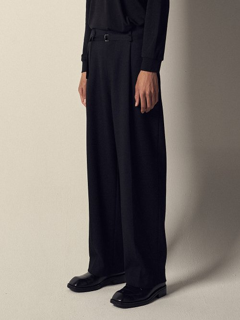

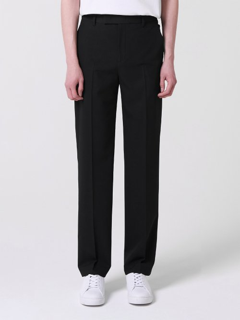

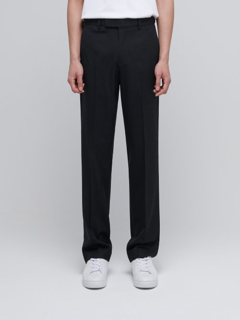

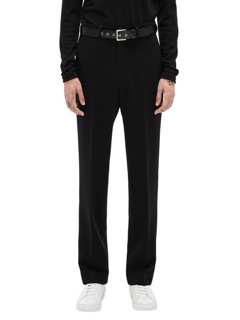

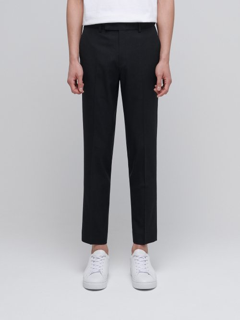

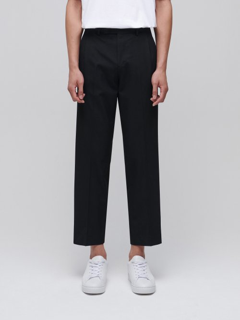

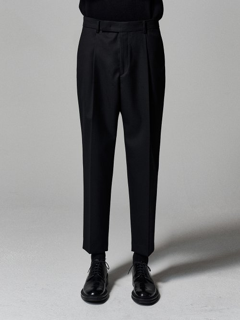

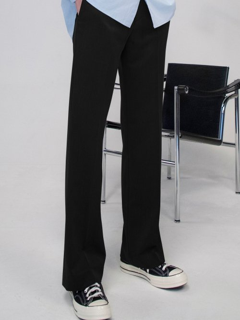

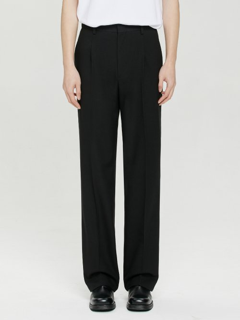

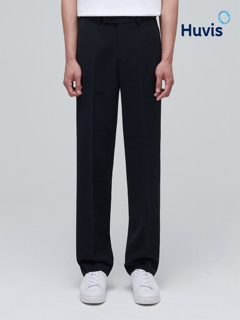

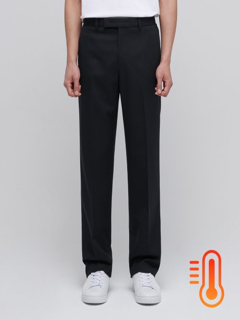

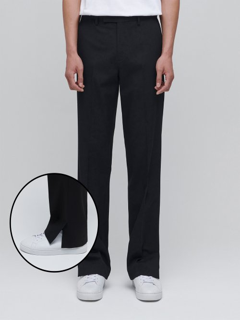

In [24]:
sample_data = preprocessed_df.loc[preprocessed_df.cluster_id == 3483]['img_url']
for img_url in sample_data:
    img = get_img_from_url(img_url)
    img = img.resize((240, 320))
    display(img)